# MiniProject 2
## Reza Yarmohamadi

In [212]:
import pandas as pd
import finpy_tse 
import random
import jalali_pandas
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression


In [214]:
sample60 = ['قچار',
 'سشمال',
 'وگستر',
 'کروی',
 'خمحرکه',
 'شلعاب',
 'دالبر',
 'وبوعلی',
 'حتاید',
 'غگل',
 'سخاش',
 'فپنتا',
 'کگل',
 'فباهنر',
 'دلقما',
 'مداران',
 'واعتبار',
 'پلوله',
 'فسپا',
 'کچاد',
 'وبصادر',
 'خریخت',
 'فسدید',
 'قشرین',
 'مرقام',
 'فنوال',
 'زنجان',
 'سبهان',
 'سمایه',
 'ثنوسا',
 'حرهشا',
 'لسرما',
 'فخوز',
 'فولاد',
 'ختور',
 'ثفارس',
 'ولغدر',
 'غنوش',
 'مارون',
 'وخارزم',
 'کماسه',
 'قجام',
 'دزهراوی',
 'بالبر',
 'خکاوه',
 'شکربن',
 'قشکر',
 'خکار',
 'شکلر',
 'سبزوا',
 'چفیبر',
 'وبانک',
 'ثعمرا',
 'وپترو',
 'شسم',
 'کایتا',
 'خاذین',
 'وملی',
 'پارتا',
 'وامید']

In [215]:
#### Finfing index return for the last 60 months
#### I didn't used "Khordad" !!!
index = finpy_tse.Get_CWI_History(start_date='1396-02-01', end_date='1401-2-31', double_date=True)
index.reset_index(inplace=True)
index["J-Date"] = index["Date"].jalali.to_jalali()
index['year'] = index["J-Date"].jalali.year
index['month'] = index["J-Date"].jalali.month
index['weekday'] = index["J-Date"].jalali.weekday
index.dropna(inplace=True)
index = index.groupby(['year', 'month']).max('Date')
index_ret = index['Adj Close'].pct_change()
index_ret.dropna(inplace=True)
index_ret

year  month
1396  3       -0.000589
      4       -0.005859
      5        0.021093
      6        0.041997
      7        0.007554
      8        0.026531
      9        0.076892
      10       0.034757
      11       0.006051
      12      -0.013517
1397  1       -0.010455
      2       -0.019400
      3        0.142833
      4        0.057880
      5        0.190132
      6        0.171188
      7        0.217655
      8       -0.051982
      9       -0.075901
      10      -0.029908
      11      -0.019203
      12       0.096466
1398  1        0.143940
      2        0.098908
      3        0.060691
      4        0.064468
      5        0.049489
      6        0.149515
      7        0.069916
      8       -0.053908
      9        0.143174
      10       0.160165
      11       0.165722
      12       0.159605
1399  1        0.242934
      2        0.518416
      3        0.212704
      4        0.514878
      5        0.079851
      6       -0.168633
      7       -0.065105
    

In [216]:
#### Building a dictionary with {key: Ticker, value: Beta}
#### I used 60 month return for Beta
#### If there was a NaN in monthly return(Stock was suspended), I filled it with zero
beta_dict = {}
all_data = index_ret
counter = 0
for stock in sample60:
    s = finpy_tse.Get_Price_History(stock=stock, start_date='1396-02-01', end_date='1401-2-31', adjust_price=True, double_date=True)
    s.reset_index(inplace=True)
    s["J-Date"] = s["Date"].jalali.to_jalali()
    s['year'] = s["J-Date"].jalali.year
    s['month'] = s["J-Date"].jalali.month
    s['weekday'] = s["J-Date"].jalali.weekday
    s = s.groupby(['year', 'month']).max('Date')
    s_ret = s['Adj Close'].pct_change()   
    s_ret.dropna(inplace=True)
    ave_ret = (s_ret+1).cumprod()
    all_data = pd.concat([all_data, s_ret], axis = 1)
    counter += 1
    model = LinearRegression()
    all_data.fillna(0, inplace=True)
    model.fit(index_ret.values.reshape(-1,1), all_data.iloc[:,counter].values)
    beta_dict[stock] = [model.coef_[0], (ave_ret.iloc[-1]-1)**(1/60) - 1, (ave_ret.iloc[-1]-1)**(1/5) - 1]
beta_dict

{'قچار': [0.5514604929828262, 0.06299138835678697, 1.0814067282176625],
 'سشمال': [0.8975239741687051, 0.0423664836895139, 0.6453006269588124],
 'وگستر': [1.0850020913673466, 0.010241403251885162, 0.13006119370263214],
 'کروی': [1.1234842947977233, 0.045700431513514106, 0.7095721992359025],
 'خمحرکه': [1.9789021004914213, 0.04123183881084591, 0.6239373632078635],
 'شلعاب': [0.6384537768420047, 0.033283093845562606, 0.48126200925605467],
 'دالبر': [0.7690656383768565, 0.03145918405809933, 0.4501888639121774],
 'وبوعلی': [1.0858800935557797, 0.04969788010384413, 0.7896653988848918],
 'حتاید': [0.6530778629943779, 0.046246745533804035, 0.7203208026278474],
 'غگل': [0.9615415738492917, 0.04422442875664356, 0.6808392750815004],
 'سخاش': [0.4908205327313284, 0.051818554145982576, 0.8335380641776462],
 'فپنتا': [0.6658999852503787, 0.07362478129466665, 1.3454724029527418],
 'کگل': [0.9815167170496596, 0.06801999851215368, 1.202686136531859],
 'فباهنر': [0.906323335969568, 0.06031308540596236,

In [217]:
beta_return_df = pd.DataFrame.from_dict(beta_dict, orient='index', columns=['Beta', "Ave_monthly_return", "Ave_yearly_return"])
beta_return_df

,Beta,Ave_monthly_return,Ave_yearly_return
قچار,0.551460,0.062991,1.081407
سشمال,0.897524,0.042366,0.645301
وگستر,1.085002,0.010241,0.130061
کروی,1.123484,0.045700,0.709572
خمحرکه,1.978902,0.041232,0.623937
شلعاب,0.638454,0.033283,0.481262
دالبر,0.769066,0.031459,0.450189
وبوعلی,1.085880,0.049698,0.789665
حتاید,0.653078,0.046247,0.720321
غگل,0.961542,0.044224,0.680839


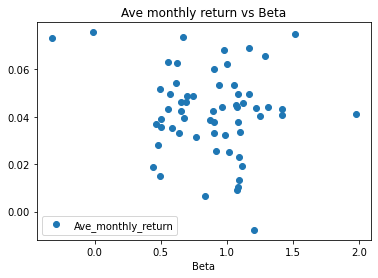

In [226]:
beta_return_df.plot(x='Beta', y='Ave_monthly_return', style='o')
plt.title("Ave monthly return vs Beta");

# Part 2

In [219]:
### Sorting
sorted_beta_return = beta_return_df.sort_values("Beta")
sorted_beta_return

,Beta,Ave_monthly_return,Ave_yearly_return
کایتا,-0.325515,0.073357,1.338462
شسم,-0.014294,0.075612,1.398111
پلوله,0.440586,0.018801,0.250469
فسدید,0.465469,0.036931,0.545239
پارتا,0.478557,0.027882,0.390976
سخاش,0.490821,0.051819,0.833538
قجام,0.493240,0.014938,0.194748
لسرما,0.501007,0.038965,0.582022
بالبر,0.504001,0.035787,0.524909
قچار,0.551460,0.062991,1.081407


In [220]:
#### building a dictionary {number 0f portfolio: df of portfolio}
portfolio_dict = {}
for i in range(0,10):
    portfolio_dict[i+1] = sorted_beta_return.iloc[i*6:(i+1)*6, :]
portfolio_dict

{1:            Beta  Ave_monthly_return  Ave_yearly_return
 کایتا -0.325515            0.073357           1.338462
 شسم   -0.014294            0.075612           1.398111
 پلوله  0.440586            0.018801           0.250469
 فسدید  0.465469            0.036931           0.545239
 پارتا  0.478557            0.027882           0.390976
 سخاش   0.490821            0.051819           0.833538,
 2:            Beta  Ave_monthly_return  Ave_yearly_return
 قجام   0.493240            0.014938           0.194748
 لسرما  0.501007            0.038965           0.582022
 بالبر  0.504001            0.035787           0.524909
 قچار   0.551460            0.062991           1.081407
 قشکر   0.557828            0.043092           0.659097
 قشرین  0.570780            0.049358           0.782729,
 3:              Beta  Ave_monthly_return  Ave_yearly_return
 واعتبار  0.584569            0.035359           0.517369
 حرهشا    0.617118            0.054168           0.883291
 شکربن    0.623302            0

In [221]:
beta_ret_portfolio_monthly = {}
beta_ret_portfolio_yearly = {}
for portfolio, stocks_df in portfolio_dict.items():
    ave_beta = stocks_df["Beta"].mean()
    stocks_df["weight"] = stocks_df["Beta"] / ave_beta
    beta_ret_portfolio_monthly[ave_beta] = (stocks_df["weight"] * stocks_df["Ave_monthly_return"]).sum()
    beta_ret_portfolio_yearly[ave_beta] = (stocks_df["weight"] * stocks_df["Ave_yearly_return"]).sum()


<ipython-input-221-ecc608a08a71>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stocks_df["weight"] = stocks_df["Beta"] / ave_beta


In [222]:
beta_ret_portfolio_monthly

{0.2559371108424839: 0.15351670478274027,
 0.5297193339761476: 0.24895175108926387,
 0.6277018966833315: 0.2742262489065863,
 0.7063253935910169: 0.2859464272953956,
 0.8863770804926122: 0.22103342381481272,
 0.9647475164634028: 0.28754312390817127,
 1.0621375646659146: 0.2145216163716928,
 1.0943921190557895: 0.14860381513290852,
 1.1886512934258333: 0.23886432671064511,
 1.48863468629832: 0.30686598984591035}

In [223]:
beta_ret_portfolio_yearly

{0.2559371108424839: 1.9719370959874933,
 0.5297193339761476: 3.894498137879581,
 0.6277018966833315: 4.322875577257979,
 0.7063253935910169: 4.598759260282417,
 0.8863770804926122: 3.397400671674041,
 0.9647475164634028: 4.6668237078136565,
 1.0621375646659146: 3.2637345769189476,
 1.0943921190557895: 2.1407150362343006,
 1.1886512934258333: 3.881734745328818,
 1.48863468629832: 5.0406939693997606}

It seems there is no clear and significant relation between Beta and Return!!!

In [224]:
a = pd.DataFrame.from_dict(beta_ret_portfolio_yearly, orient='index', columns=['yearly return'])
a.reset_index(inplace=True)
a.columns = ['Beta', 'Yearly return']
a

,Beta,Yearly return
0,0.255937,1.971937
1,0.529719,3.894498
2,0.627702,4.322876
3,0.706325,4.598759
4,0.886377,3.397401
5,0.964748,4.666824
6,1.062138,3.263735
7,1.094392,2.140715
8,1.188651,3.881735
9,1.488635,5.040694


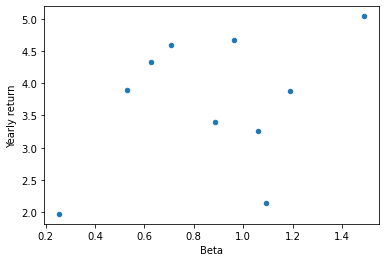

In [225]:
a.plot(kind='scatter', x='Beta', y='Yearly return');

No significant relation between Beta and Return